- [字典转换datafram](https://github.com/vi3k6i5/pandas_basics/blob/master/1_a_create_a_dataframe_from_dictonary.ipynb)
- [pandas处理大数据量级](https://www.jianshu.com/p/c862130f322d)
- [嵌套json](https://blog.csdn.net/qq_17550379/article/details/80276477)

- https://codeday.me/bug/20180916/251775.html
- https://www.kaggle.com/jboysen/quick-tutorial-flatten-nested-json-in-pandas

In [11]:
import json
from pandas.io.json import json_normalize
import pandas as pd
jsonfile = r'small.json'
with open(jsonfile, 'r') as infile:
    for line in infile:
        uline = json.loads(line)
        df = json_normalize(data=uline,)
        print(df)

  100 101 102 103 104 66 67 68 69 70 ... 90 91 92 93 94 95 96 97 98 99
0   A   D   Y   Y   C  N  R  P  S  G ...  T  I  S  G  L  Q  A  E  D  E

[1 rows x 36 columns]
  100 101 102 103 104 66 67A 68 69 70 ... 90 91 92 93 94 95 96 97 98 99
0   A   D   Y   Y   C  S   R  M  S  G ...  T  I  S  G  L  Q  A  E  D  E

[1 rows x 36 columns]
  100 101 102 103 104 66 67 68 69 70 ... 90 91 92 93 94 95 96 97 98 99
0   A   D   Y   Y   C  S  R  P  S  G ...  T  I  S  G  L  Q  A  E  D  E

[1 rows x 36 columns]
  100 101 102 103 104 66 67 68 69 70 ... 90 91 92 93 94 95 96 97B 98 99
0   A   D   Y   Y   C  S  R  P  S  G ...  T  I  S  G  L  Q  A   E  D  E

[1 rows x 36 columns]
  100 101 102 103 104 66 67 68 69 70 ... 90 91 92 93 94 95 96 97 98 99
0   A   D   Y   Y   C  V  G  P  Q  G ...  T  I  S  G  L  Q  A  E  D  E

[1 rows x 36 columns]


In [12]:
data = []
with open(jsonfile, 'r') as infile:
    for line in infile:
        uline = json.loads(line)
        data.append(uline)
df = json_normalize(data)
df

,100,101,102,103,104,66,67,67A,68,69,...,91,92,93,94,95,96,97,97B,98,99
0,A,D,Y,Y,C,N,R,NaN,P,S,...,I,S,G,L,Q,A,E,NaN,D,E
1,A,D,Y,Y,C,S,NaN,R,M,S,...,I,S,G,L,Q,A,E,NaN,D,E
2,A,D,Y,Y,C,S,R,NaN,P,S,...,I,S,G,L,Q,A,E,NaN,D,E
3,A,D,Y,Y,C,S,R,NaN,P,S,...,I,S,G,L,Q,A,NaN,E,D,E
4,A,D,Y,Y,C,V,G,NaN,P,Q,...,I,S,G,L,Q,A,E,NaN,D,E


In [13]:
df_sort = df.reindex(sorted(df.columns, key=lambda x: float(x)), axis=1) 
df_sort

ValueError: could not convert string to float: '67A'

In [14]:
import re

_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)]


In [15]:
df_sort = df.reindex(sorted(df.columns, key=natural_sort_key), axis=1)

In [16]:
df_sort

,66,67,67A,68,69,70,71,72,74,75,...,96,97,97B,98,99,100,101,102,103,104
0,N,R,NaN,P,S,G,V,S,N,R,...,A,E,NaN,D,E,A,D,Y,Y,C
1,S,NaN,R,M,S,G,V,S,R,R,...,A,E,NaN,D,E,A,D,Y,Y,C
2,S,R,NaN,P,S,G,V,S,R,R,...,A,E,NaN,D,E,A,D,Y,Y,C
3,S,R,NaN,P,S,G,V,S,R,R,...,A,NaN,E,D,E,A,D,Y,Y,C
4,V,G,NaN,P,Q,G,F,R,R,R,...,A,E,NaN,D,E,A,D,Y,Y,C


In [17]:
df['66'].value_counts(normalize=True) 

S    0.6
V    0.2
N    0.2
Name: 66, dtype: float64

In [20]:
df_sort.apply(lambda x: pd.value_counts(x, normalize=True),axis=0)

,66,67,67A,68,69,70,71,72,74,75,...,96,97,97B,98,99,100,101,102,103,104
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,0.25,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
ww_df=df_sort.apply(lambda x: pd.value_counts(x, normalize=True),axis=0)
ff_df = ww_df.fillna(0).T
ff_df.to_csv('mytest.csv',index_label='pos')

In [4]:
import logomaker
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
df = pd.read_csv(r'D:/WORKcode/VL-naive-NGS-data/IGLV2-14.cdrl2.csv')
ww_df = df.drop(['pos'],axis =1)


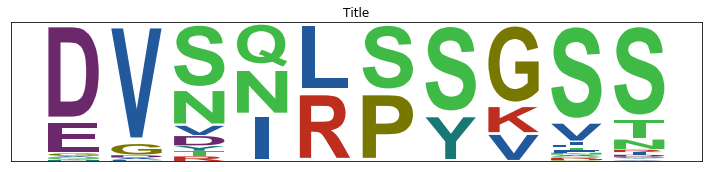

In [19]:
ww_logo = logomaker.Logo(ww_df,
                         font_name='Arial',
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

# style using Logo methods
ww_logo.style_xticks(anchor=0, spacing=5)


# style using Axes methods

ww_logo.ax.set_xlim([-1,len(ww_df)])
#ww_logo.ax.set_xticklabels(range(56,66))
ww_logo.ax.set_xticks([])
ww_logo.ax.set_yticks([])
ww_logo.ax.set_title('Title')
plt.savefig('foo.png', dpi=600)
ww_logo.fig.tight_layout()